# Evolutation d'une population (correction)

In [1]:
from pyquickhelper.ipythonhelper import add_notebook_menu
add_notebook_menu()

### Exercice 1 : pyramides des âges

In [1]:
from actuariat_python.data import population_france_2015
df = population_france_2015()
df.head(n=3)

,naissance,age,hommes,femmes,ensemble
10,2014,0,403837,386619,790456
11,2013,1,404502,386726,791228
12,2012,2,411217,393181,804398


In [2]:
hommes = df["hommes"]
femmes = df["femmes"]
somme = hommes - femmes

Je reprends ici le code exposé à [Damien Vergnaud's Homepage](http://www.di.ens.fr/~vergnaud/TPc_20150304_Python.html) en l'adaptant un peu avec les fonctions de matplotlib via l'interface [pyplot](http://matplotlib.org/api/pyplot_api.html). Puis j'ajoute la différence par âge. On commence souvent par la [gallerie](http://matplotlib.org/gallery.html) pour voir si un graphe ou juste une partie est similaire à ce qu'on veut obtenir.

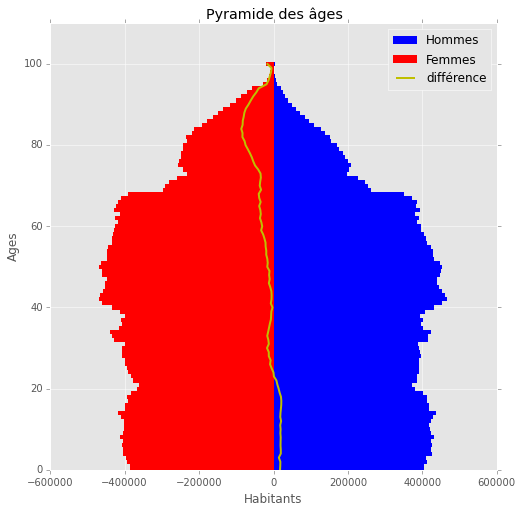

In [3]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,8))
ValH = ax.barh(arange(len(hommes)),hommes,1.0,label="Hommes",color='b',linewidth=0,align='center')
ValF = ax.barh(arange(len(femmes)),-femmes,1.0,label="Femmes",color='r',linewidth=0,align='center')
diff, = ax.plot(somme,arange(len(femmes)),'y',linewidth=2)
ax.set_title("Pyramide des âges")
ax.set_ylabel("Ages")
ax.set_xlabel("Habitants")
ax.set_ylim([0,110])
ax.legend((ValH[0],ValF[0],diff),('Hommes','Femmes','différence'))

Le même en utilisant la fonction insérée dans le module [actuariat_python](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/index.html).

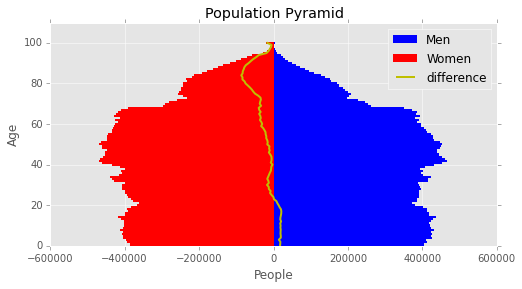

In [8]:
from actuariat_python.plots import plot_population_pyramid
plot_population_pyramid(df["hommes"], df["femmes"], figsize=(8,4))

### Exercice 2 : calcul de l'espérance de vie

Le premier objectif est de calculer l'[espérance de vie](https://en.wikipedia.org/wiki/Life_expectancy) à l'âge $t$ à partir de la table de mortalité. On récupère cette table.

In [1]:
from actuariat_python.data import table_mortalite_france_00_02
df=table_mortalite_france_00_02()
df.head()

,Age,Homme,Femme
0,0,100000,100000
1,1,99511,99616
2,2,99473,99583
3,3,99446,99562
4,4,99424,99545


On note $P_t$ la population l'âge $t$. La probabilité de rester en vie à la date $t+d$ est $\frac{P_{t+d}-P_t}{P_t}$. L'espérance de vie s'exprime :

$$E(t) = \sum_{d=1}^\infty d \frac{P_{t+d}-P_t}{P_t}$$

Pour accélérer les calculs, on calcule la différence :

$$\begin{array}{rcl} P_{t+1}E(t+1) - P_t E(t) &=& \sum_{d=1}^\infty d \left( P_{t+d+1}-P_{t+1} \right) -  \sum_{d=1}^\infty d \left( P_{t+d}-P_t \right) \\ &=& \sum_{d=2}^\infty (d-1) \left( P_{t+d}-P_{t+1} \right) -  \sum_{d=1}^\infty d \left( P_{t+d}-P_t \right)\end{array}$$

### Exercice 3 : simulation de la pyramide en 2016

On suppose qu'il n'y a pas de naissance, on calcule la population en janvier 2016 en appliquant les taux de mortalité de la table récupérée. On représente les deux pyramides sur le même graphique.

### Exercice 4 : simulation jusqu'en 2100

On suppose toujours qu'il n'y a pas de naissance. On continue la simulation jusqu'en 2100. On trace le même graphique avec cette nouvelle année.

### Exercice 5 : simulation avec les naissances

On reprend la même simulation mais on tient compte des naissances.